# Supervised Learning Guided Lesson


In [126]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

Now we'll read our dataset with pandas:

In [41]:
kickstarter = pd.read_csv('../ks-projects-201801.csv')

In [42]:
kickstarter.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0000,2015-08-11 12:12:28,0.0000,failed,0,GB,0.0000,0.0000,1533.9500
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0000,2017-09-02 04:43:57,2421.0000,failed,15,US,100.0000,2421.0000,30000.0000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0000,2013-01-12 00:20:50,220.0000,failed,3,US,220.0000,220.0000,45000.0000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0000,2012-03-17 03:24:11,1.0000,failed,1,US,1.0000,1.0000,5000.0000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0000,2015-07-04 08:35:03,1283.0000,canceled,14,US,1283.0000,1283.0000,19500.0000


Let's start by looking at the shape of our data and the column types.

In [17]:
kickstarter.shape

(378661, 15)

In [43]:
kickstarter.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

We should also look at the summary statistics for all the numeric columns using the describe function. 

In [20]:
kickstarter.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,378661.0000,378661.0000,378661.0000,378661.0000,374864.0000,378661.0000,378661.0000
mean,1074731191.9888,49080.7915,9682.9793,105.6175,7036.7289,9058.9241,45454.4015
std,619086204.3226,1183391.2591,95636.0100,907.1850,78639.7453,90973.3431,1152950.0551
min,5971.0000,0.0100,0.0000,0.0000,0.0000,0.0000,0.0100
25%,538263516.0000,2000.0000,30.0000,2.0000,16.9800,31.0000,2000.0000
50%,1075275634.0000,5200.0000,620.0000,12.0000,394.7200,624.3300,5500.0000
75%,1610148624.0000,16000.0000,4076.0000,56.0000,3034.0900,4050.0000,15500.0000
max,2147476221.0000,100000000.0000,20338986.2700,219382.0000,20338986.2700,20338986.2700,166361390.7100


In [21]:
kickstarter.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

We can evaluate the percent of projects in each group as well by setting normalize to True in the function. 

In [22]:
kickstarter.state.value_counts(normalize=True)

failed       0.5222
successful   0.3538
canceled     0.1024
undefined    0.0094
live         0.0074
suspended    0.0049
Name: state, dtype: float64

It seems that about 52% of projects while about 35% have succeeded. The rest have classifications that really aren't relevant for our analysis. Therefore, we should remove these rows from our data.

In [44]:
kickstarter_classify = kickstarter[kickstarter.state.isin(['failed', 'successful'])]
kickstarter_classify.state.value_counts(normalize=True)

failed       0.5961
successful   0.4039
Name: state, dtype: float64

Next we look at the main_category column. We use the value_counts function to evaluate how many projects are in each category. 

In [24]:
kickstarter_classify.main_category.value_counts()

Film & Video    56527
Music           45949
Publishing      35445
Games           28521
Technology      27050
Art             25641
Design          25364
Food            22054
Fashion         19775
Theater         10242
Comics           9878
Photography      9689
Crafts           7818
Journalism       4149
Dance            3573
Name: main_category, dtype: int64

We can use the crosstab function to see how successful projects are in each category. 

In [25]:
pd.crosstab(kickstarter_classify.main_category,kickstarter_classify.state)

state,failed,successful
main_category,,
Art,14131,11510
Comics,4036,5842
Crafts,5703,2115
Dance,1235,2338
Design,14814,10550
Fashion,14182,5593
Film & Video,32904,23623
Food,15969,6085
Games,16003,12518


We can also add the success rate for each category.

In [26]:
category_crosstab = pd.crosstab(kickstarter_classify.main_category,kickstarter_classify.state)
category_crosstab['success_rate'] = category_crosstab.successful/(category_crosstab.successful+category_crosstab.failed)
category_crosstab

state,failed,successful,success_rate
main_category,,,
Art,14131,11510,0.4489
Comics,4036,5842,0.5914
Crafts,5703,2115,0.2705
Dance,1235,2338,0.6544
Design,14814,10550,0.4159
Fashion,14182,5593,0.2828
Film & Video,32904,23623,0.4179
Food,15969,6085,0.2759
Games,16003,12518,0.4389


In [27]:
kickstarter_classify.currency.value_counts()

USD    261511
GBP     29476
EUR     14378
CAD     12375
AUD      6621
SEK      1510
MXN      1411
NZD      1274
DKK       929
CHF       652
NOK       584
HKD       477
SGD       454
JPY        23
Name: currency, dtype: int64

Clearly, the most popular currency is the US Dollar.

In [28]:
currency_crosstab = pd.crosstab(kickstarter_classify.currency,kickstarter_classify.state)
currency_crosstab['success_rate'] = currency_crosstab.successful/(currency_crosstab.successful+currency_crosstab.failed)
currency_crosstab

state,failed,successful,success_rate
currency,,,
AUD,4610,2011,0.3037
CAD,8238,4137,0.3343
CHF,465,187,0.2868
DKK,567,362,0.3897
EUR,10496,3882,0.2700
GBP,17395,12081,0.4099
HKD,261,216,0.4528
JPY,16,7,0.3043
MXN,1015,396,0.2807


# Visualizing the Data


In [49]:
kick_classify=kickstarter_classify.copy()
kick_classify['launched_date'] = pd.to_datetime(kick_classify.launched)
kick_classify['deadline_date'] = pd.to_datetime(kick_classify.deadline)

In [50]:
kick_classify['duration'] = (kick_classify.deadline_date - kick_classify.launched_date).dt.days

Initially, we plot the histogram of all durations.



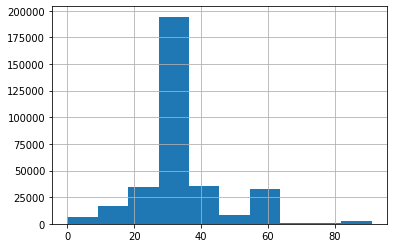

In [54]:
kick_classify.duration.hist();

Let's plot the successful and failed projects side by side to see if their distributions differ.

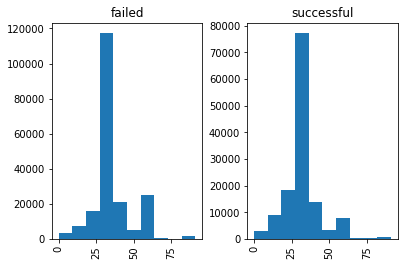

In [31]:
kick_classify.duration.hist(by=kick_classify.state);

In [34]:
max(kick_classify.usd_goal_real)

166361390.71

In [60]:
kick_classify[kick_classify.usd_goal_real > 1000000].head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_date,deadline_date,duration
340,1001542282,You in a novel,Publishing,Publishing,EUR,2015-11-09,1000000.0000,2015-09-10 23:03:21,10.0000,failed,1,IT,11.1800,10.7600,1076403.0900,2015-09-10 23:03:21,2015-11-09,59
971,1004941506,Maori MBT Awareness Centre,Web,Journalism,CAD,2017-10-18,2000000.0000,2017-08-19 22:13:55,2242.0000,failed,19,CA,1160.6700,1794.4600,1600768.3700,2017-08-19 22:13:55,2017-10-18,59
1042,1005237669,The Old Soul of a Lion,Film & Video,Film & Video,USD,2014-10-14,3000000.0000,2014-08-15 20:16:22,4.0000,failed,2,US,4.0000,4.0000,3000000.0000,2014-08-15 20:16:22,2014-10-14,59
1144,1005820080,The Million Pound Shirt,Fashion,Fashion,GBP,2015-11-25,1000000.0000,2015-10-21 22:00:04,10.0000,failed,1,GB,15.4700,15.0500,1505185.3600,2015-10-21 22:00:04,2015-11-25,34
1795,1009207145,** GOLIATH **,Product Design,Design,CAD,2014-07-21,3850000.0000,2014-06-21 22:34:21,285.0000,failed,5,CA,263.4100,264.6700,3575408.6200,2014-06-21 22:34:21,2014-07-21,29


In [23]:
kick_classify[kick_classify.usd_goal_real > 1000000].state.value_counts()

failed        829
successful     11
Name: state, dtype: int64

The next step is to look at the correlation between the numeric variables to determine that there are no highly correlated variables.

In [62]:
kick_classify.corr()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,duration
ID,1.0000,0.0019,0.0009,0.0008,-0.0003,0.0003,0.0018,0.0028
goal,0.0019,1.0000,0.0080,0.0048,0.0064,0.0060,0.9526,0.0227
pledged,0.0009,0.0080,1.0000,0.7173,0.8580,0.9536,0.0057,0.0081
backers,0.0008,0.0048,0.7173,1.0000,0.6975,0.7523,0.0052,-0.0000
usd pledged,-0.0003,0.0064,0.8580,0.6975,1.0000,0.9077,0.0070,0.0077
usd_pledged_real,0.0003,0.0060,0.9536,0.7523,0.9077,1.0000,0.0064,0.0087
usd_goal_real,0.0018,0.9526,0.0057,0.0052,0.0070,0.0064,1.0000,0.0216
duration,0.0028,0.0227,0.0081,-0.0000,0.0077,0.0087,0.0216,1.0000


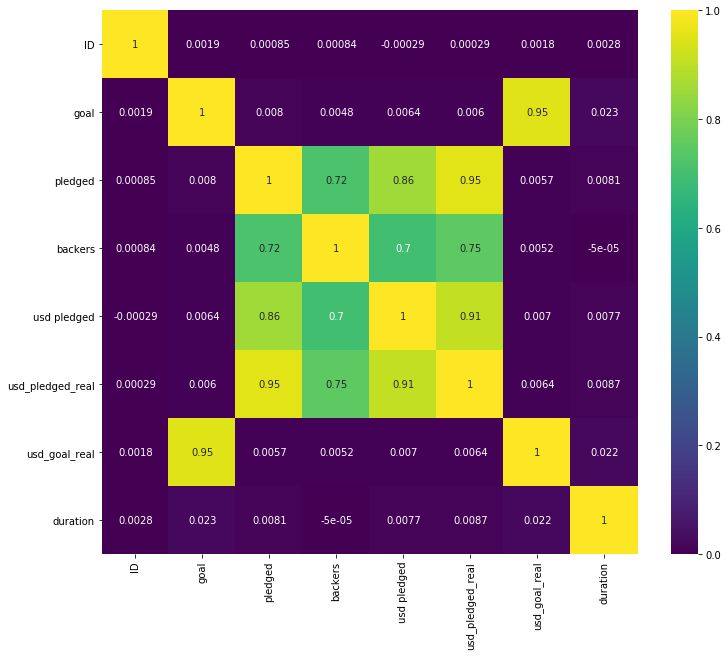

In [39]:
plt.figure(figsize=(12,10))
kick_classify.corr()
sns.heatmap(kick_classify.corr(), cmap='viridis', annot=True);

In [63]:
kick_classify.isnull().sum(axis = 0)

ID                    0
name                  3
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         210
usd_pledged_real      0
usd_goal_real         0
launched_date         0
deadline_date         0
duration              0
dtype: int64

The only variable containing missing data is the amount of pledged dollars. This confirms that we should remove this column.



# Preparing the Data


In [67]:
kickstarter_variables = kick_classify[['usd_goal_real', 'backers', 'main_category', 'duration', 'currency']]
kickstarter_y = pd.get_dummies(data=kickstarter_classify['state'], drop_first=True)

The next step in our data processing is to convert the categorical variables to dummy variables using the get_dummies function. 

In [70]:
kickstarter_x = pd.get_dummies(data=kickstarter_variables, columns=['main_category', 'currency'], drop_first=True)
kickstarter_x.shape

(331675, 30)

In [125]:
kickstarter_x.head()

,usd_goal_real,backers,duration,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,...,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,1533.9500,0,58,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,30000.0000,15,59,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,45000.0000,3,44,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,5000.0000,1,29,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,50000.0000,224,34,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


Using the head function shows us that we have increased the number of columns from the 5 that we initially selected to 30 columns total.

The final step in the processing phase is to separate the data into test and train datasets.  We randomly select 80% of the data for the training dataset and the remaining 20% is used for the test dataset.

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(kickstarter_x, kickstarter_y, test_size=0.2)

# Creating the Model

Since this is a classification problem, there are a number of algorithms at our disposal. Logistic regression is a good choice for our problem. Another good choice is random forest. SVM is also a suitable option for this type of problem.

**Logistic Regression**

First we generate our model and then we will proceed to evaluate it.

In [84]:
from sklearn.linear_model import LogisticRegression

#y_train=y_train.reshape(len(y_train),)

ks_model = LogisticRegression(solver='lbfgs', max_iter=200).fit(X_train, y_train)

/miniconda3/envs/diamonds/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
ks_model #Parameters

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

One way to evaluate the model is using a confusion matrix. The confusion matrix specifies how many observations were correctly classified and how many were incorrectly classified.



In [87]:
y_pred_test = ks_model.predict(X_test)

In [89]:
y_pred_test[:10]

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0], dtype=uint8)

In [98]:
list(y_test[:10].values)

[array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([0], dtype=uint8),
 array([0], dtype=uint8),
 array([0], dtype=uint8),
 array([0], dtype=uint8),
 array([0], dtype=uint8)]

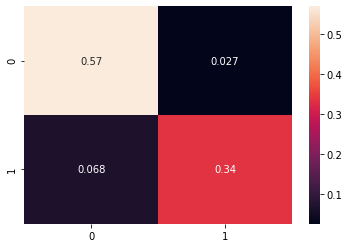

In [106]:
matrix_pred = confusion_matrix(y_test, y_pred_test)

matrix_per = matrix_pred/len(y_test)

sns.heatmap(matrix_per, annot=True)

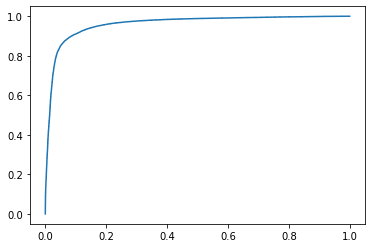

In [107]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

from sklearn import metrics

y_pred_proba = ks_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr);

In [108]:
y_pred_proba

array([9.99179495e-001, 9.99997557e-001, 1.24891974e-002, ...,
       6.80711423e-100, 1.07299891e-001, 9.66796953e-001])

In [32]:
auc

0.9568587216249149

The area under the curve is over 0.95. This is a decent number, but perhaps we could do better with a different algorithm.


**Random Forest**

Random forest is an ensemble algorithm. This means that it resamples the data multiple times and generates a decision tree from each sample. We then think of the trees as a group of algorithms. We base our decision on the outcome of the majority of algorithms in the ensemble.

In [109]:
from sklearn.ensemble import RandomForestClassifier

ks_rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

/miniconda3/envs/diamonds/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [110]:
ks_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Here is our confusion matrix:

In [111]:
y_pred_test_rf = ks_rf.predict(X_test)
confusion_matrix(y_test, y_pred_test_rf)

array([[36862,  2604],
       [ 2404, 24465]])

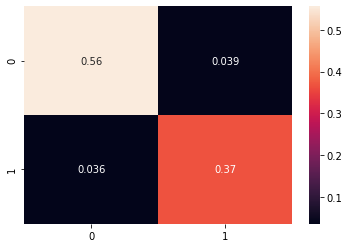

In [112]:
# Matrix with Random forest

matrix_pred_random = confusion_matrix(y_test, y_pred_test_rf)

matrix_per_random = matrix_pred_random/len(y_test)

sns.heatmap(matrix_per_random, annot=True)

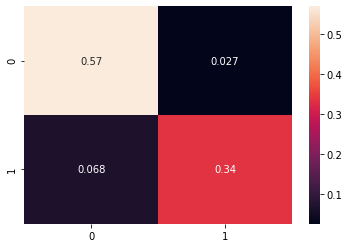

In [113]:
# Matrix with Logistic Regression

sns.heatmap(matrix_per, annot=True)

Let's plot the ROC curve for the random forest that we have generated.

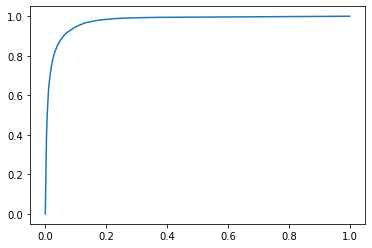

In [123]:
y_pred_proba_rf = ks_rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_rf)
auc = metrics.roc_auc_score(y_test, y_pred_proba_rf)

plt.plot(fpr,tpr);

In [124]:
auc

0.975351951756666

While our AUC was already high, we have improved the score using the random forest algorithm.